# In-Class Lab: Spearman’s Rank Correlation Test Using Boston Housing Data

In [85]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Download the Dataset:

In [86]:
# Load the dataset
data = pd.read_csv("boston.csv")

# Preview the data
print(data.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## 2. Data Exploration and Cleaning:

In [87]:
# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values:\n{missing_values}")

print(data.info())  # Confirm there are no missing values

Missing values:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


## 3. Feature Selection for Analysis:

- CRIM (per capita crime rate) vs. MEDV (median value of owner-occupied homes).
- RM (average number of rooms per dwelling) vs. LSTAT (percentage of lower-status population).
-  AGE (proportion of owner-occupied units built before 1940) vs. MEDV (median value of owner-occupied homes)

## 4. Perform Spearman's Rank Correlation:

In [88]:
# CRIM vs. MEDV
corr_crim_medv, p_crim_medv = spearmanr(data['CRIM'], data['MEDV'])
print(f"Spearman Correlation between CRIM and MEDV: {corr_crim_medv}, P-value: {p_crim_medv}")

# RM vs. LSTAT
corr_rm_lstat, p_rm_lstat = spearmanr(data['RM'], data['LSTAT'])
print(f"Spearman Correlation between RM and LSTAT: {corr_rm_lstat}, P-value: {p_rm_lstat}")

# AGE vs. MEDV
corr_age_medv, p_age_medv = spearmanr(data['AGE'], data['MEDV'])
print(f"Spearman Correlation between AGE and MEDV: {corr_age_medv}, P-value: {p_age_medv}")


Spearman Correlation between CRIM and MEDV: -0.5588909488368801, P-value: 6.553335889228178e-43
Spearman Correlation between RM and LSTAT: -0.64083155697968, P-value: 7.478416968302715e-60
Spearman Correlation between AGE and MEDV: -0.5475616874543465, P-value: 6.343734710404128e-41


Interpretation:

- A correlation coefficient close to 1 or -1 indicates a strong monotonic relationship.
- A p-value < 0.05 indicates that the correlation is statistically significant.

## 5. Visualization

### Scatter plots with trendlines

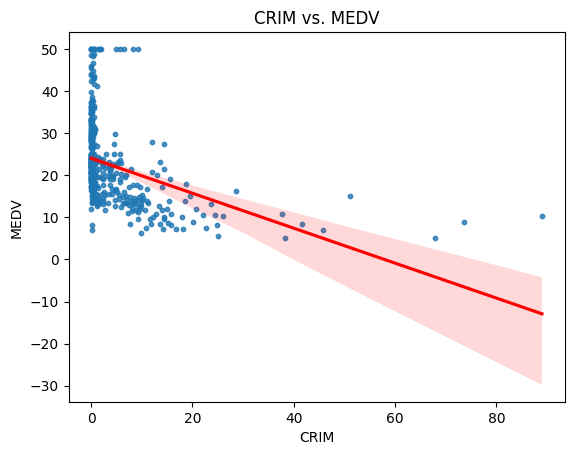

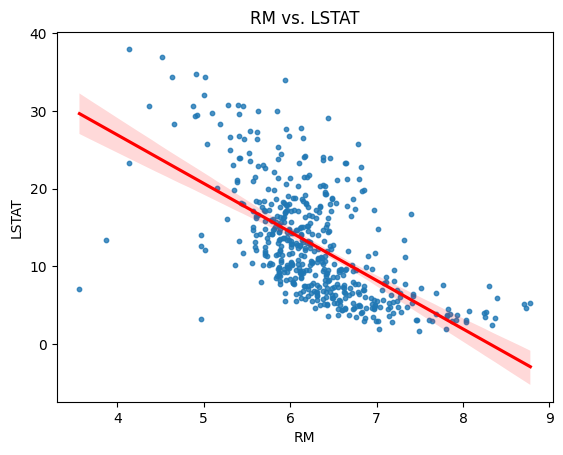

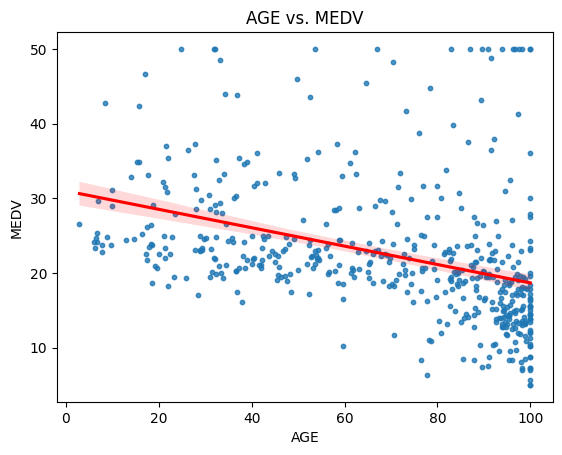

In [89]:
# Scatterplot for CRIM vs. MEDV
sns.regplot(x='CRIM', y='MEDV', data=data, scatter_kws={'s':10}, line_kws={"color":"r"})
plt.title("CRIM vs. MEDV")
plt.show()

# Scatterplot for RM vs. LSTAT
sns.regplot(x='RM', y='LSTAT', data=data, scatter_kws={'s':10}, line_kws={"color":"r"})
plt.title("RM vs. LSTAT")
plt.show()

# Scatterplot for AGE vs. MEDV
sns.regplot(x='AGE', y='MEDV', data=data, scatter_kws={'s':10}, line_kws={"color":"r"})
plt.title("AGE vs. MEDV")
plt.show()

### Spearman correlation matrix

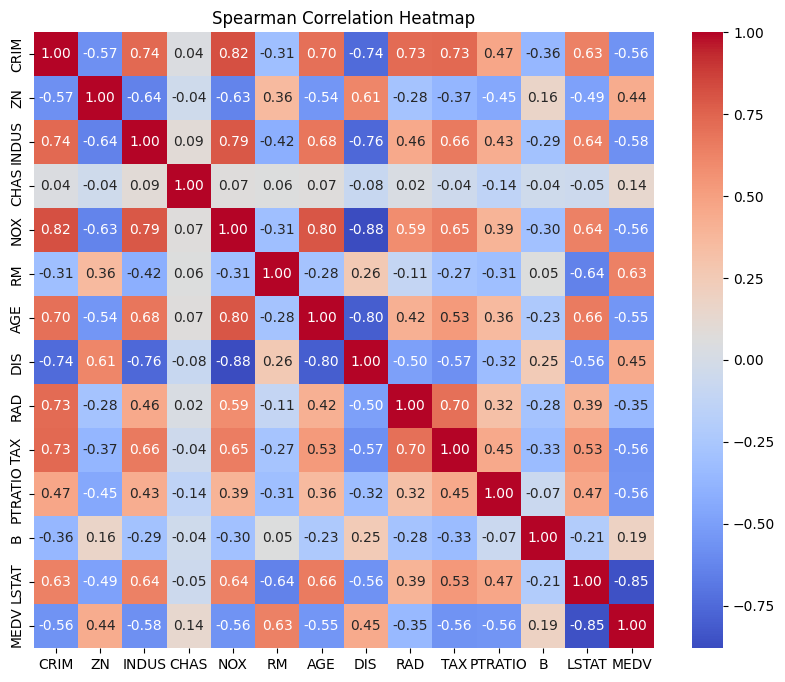

In [90]:
# Compute the Spearman correlation matrix
spearman_corr = data.corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

## 6. Findings:

### Summary:

- CRIM vs. MEDV: Correlation = -0.56, indicating a negative relationship (significant at p < 0.05).
- RM vs. LSTAT: Correlation = -0.64, indicating a strong negative relationship (significant at p < 0.05).
- AGE vs. MEDV: Correlation = -0.55, indicating a negative relationship (significant at p < 0.05).

### Insights:

- Higher crime rates are associated with lower housing prices.
- More rooms in a dwelling correlate with a lower percentage of the lower-status population.
- The value of houses tends to decrease in areas with a higher proportion of older houses.